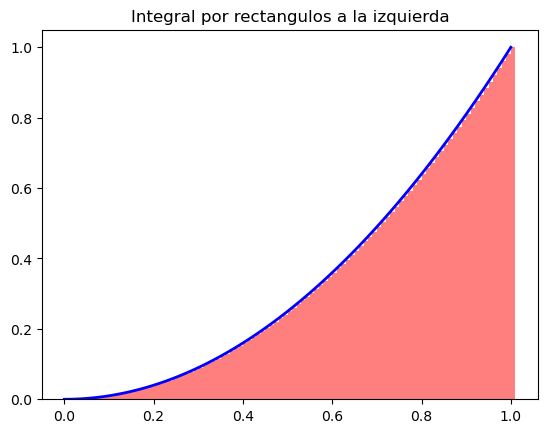

In [6]:
# Aproximar el valor de la integral por rectangulos a la izquierda
# f(x) = x^2, [0, 1], n = 4

def f(x):
    return x**2

def integral_rectangulos_izquierda(f, a, b, n):
    h = (b - a) / n
    suma = 0
    for i in range(n):
        suma += f(a + i*h)
    return h*suma

def integral_rectangulos_izquierda_graph(f, a, b, n):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    h = (b - a) / n
    x = np.linspace(a, b, 100)
    y = f(x)
    x_rect = np.linspace(a, b, n+1)
    y_rect = f(x_rect)
    
    plt.plot(x, y, 'b', lw=2)
    plt.bar(x_rect, y_rect, width=h, align='edge', color='r', alpha=0.5)
    plt.title('Integral por rectangulos a la izquierda')
    plt.show()
    
    return None

a = 0
b = 1
n = 100

integral_rectangulos_izquierda_graph(f, a, b, n)



In [12]:
import pandas as pd

database = pd.DataFrame(columns=['Aproximacion','Error Respecto al anterior','Metodo','n', 'integral'])

def aproximacionIzquierda(f, a, b, n):
    return integral_rectangulos_izquierda(f, a, b, n)

def aproximacionDerecha(f, a, b, n):
    return integral_rectangulos_izquierda(f, a, b, n)

# intentos cada vez mas grandes
tries = [2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]
a = 0
b = 1

for n in tries:
    database = database._append({'Aproximacion': aproximacionIzquierda(f, a, b, n),
                                'Error Respecto al anterior': aproximacionIzquierda(f, a, b, n) - aproximacionIzquierda(f, a, b, int(n/2)),
                                'Metodo': 'Rectangulos Izquierda',
                                'n': n,
                                'integral': 1/3}, ignore_index=True)
    
database

/tmp/ipykernel_6048/1568043787.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  database = database._append({'Aproximacion': aproximacionIzquierda(f, a, b, n),


,Aproximacion,Error Respecto al anterior,Metodo,n,integral
0,0.125000,0.125000,Rectangulos Izquierda,2,0.333333
1,0.218750,0.093750,Rectangulos Izquierda,4,0.333333
2,0.273438,0.054688,Rectangulos Izquierda,8,0.333333
3,0.302734,0.029297,Rectangulos Izquierda,16,0.333333
4,0.317871,0.015137,Rectangulos Izquierda,32,0.333333
5,0.325562,0.007690,Rectangulos Izquierda,64,0.333333
6,0.329437,0.003876,Rectangulos Izquierda,128,0.333333
7,0.331383,0.001945,Rectangulos Izquierda,256,0.333333
8,0.332357,0.000975,Rectangulos Izquierda,512,0.333333
9,0.332845,0.000488,Rectangulos Izquierda,1024,0.333333


In [17]:
# Aproximar regla del trapacio para aproximar la integral integral(phi(x) = (1/sqrt(2*pi))*e**(-y**2/2)dy, [0, -inf])
import numpy as np
import sympy as sp

def phi(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-y**2/2)

def integral_trapecios(f, a, b, n):
    h = (b - a) / n
    suma = 0
    for i in range(1, n):
        suma += f(a + i*h)
    return h*(f(a)/2 + suma + f(b)/2)

def integral_trapecios_graph(f, a, b, n):
        
        import matplotlib.pyplot as plt
        import numpy as np
        
        h = (b - a) / n
        x = np.linspace(a, b, 100)
        y = f(x)
        x_rect = np.linspace(a, b, n+1)
        y_rect = f(x_rect)
        
        plt.plot(x, y, 'b', lw=2)
        plt.bar(x_rect, y_rect, width=h, align='edge', color='r', alpha=0.5)
        plt.title('Integral por trapecios')
        plt.show()
        
        return None
    
a = 0
b = 1
n = 100

integral_trapecios(f(0), a, b, n)


TypeError: 'Mul' object is not callable

Integral aproximada usando la regla del trapecio: 0.47689017030156466
Integral aproximada usando el método de los rectángulos: 0.477429625973033


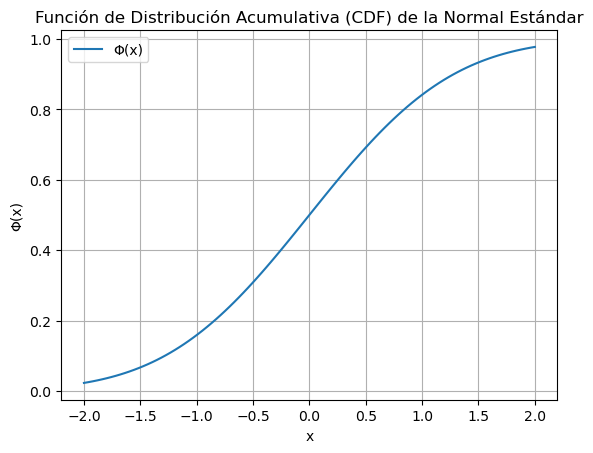

In [33]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Definimos la función de densidad de probabilidad normal estándar
def normal_pdf(y):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-y**2 / 2)

# Ejercicio 1: Regla del trapecio
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

# Aproximación de la integral desde -N hasta 0
N = 2
a, b = -N, 0
n = 10
trap_result = trapezoidal_rule(normal_pdf, a, b, n)
print(f"Integral aproximada usando la regla del trapecio: {trap_result}")

# Ejercicio 2: Método de los rectángulos
def rectangular_rule(f, a, b, n):
    x = np.linspace(a + (b-a)/(2*n), b - (b-a)/(2*n), n)
    y = f(x)
    h = (b - a) / n
    return np.sum(y * h)

rect_result = rectangular_rule(normal_pdf, a, b, n)
print(f"Integral aproximada usando el método de los rectángulos: {rect_result}")

# Ejercicio 3: Función para calcular Phi(x)
def phi(x):
    return integrate.quad(normal_pdf, -np.inf, x)[0]

# Ejemplo de uso de la función Phi(x)
x_values = np.linspace(-N, N, 100)
phi_values = [phi(x) for x in x_values]

plt.plot(x_values, phi_values, label='Φ(x)')
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.title('Función de Distribución Acumulativa (CDF) de la Normal Estándar')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# Usar el metodo de simpson 3/8 para phi(x)

import numpy as np

def simpson_38(f, a, b, n):
    """
    Aproximación de la integral de f desde a hasta b usando el método de Simpson 3/8.
    
    :param f: Función a integrar.
    :param a: Límite inferior de integración.
    :param b: Límite superior de integración.
    :param n: Número de subintervalos (debe ser múltiplo de 3).
    :return: Aproximación de la integral.
    """
    if n % 3 != 0:
        raise ValueError("El número de subintervalos debe ser múltiplo de 3")
    
    h = (b - a) / n
    integral = f(a) + f(b)
    
    for i in range(1, n):
        k = a + i * h
        if i % 3 == 0:
            integral += 2 * f(k)
        elif i != n/3:
            integral += 3 * f(k)
    
    integral *= 3 * h / 8
    return integral

def phi(x):
    # Aquí define la función phi(x). Como ejemplo, usaremos la función de densidad normal estándar.
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Para manejar el límite inferior infinito, realizamos un cambio de variable, por ejemplo t = -1/x
# Esto convierte la integral de -inf a 0 en una integral de 0 a inf.
# Supongamos que realizamos la integración numérica de -10 a 0 en lugar de -inf a 0 como una aproximación.

a = -10  # Límite inferior aproximado
b = 0    # Límite superior
n = 12   # Número de subintervalos (múltiplo de 3)

result = simpson_38(phi, a, b, n)
print(f"Resultado de la integral usando el método de Simpson 3/8: {result}")

# Comparar metodo de simpson 3/8 con el metodo de trapecios

def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b - a) / n
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])


trap_result = trapezoidal_rule(phi, a, b, n)
print(f"Resultado de la integral usando la regla del trapecio: {trap_result}")

# Error relativo y absoluto
print("\nError de simpson 3/8:")
exact_value = 0.5
abs_error = np.abs(result - exact_value)
rel_error = abs_error / exact_value
print(f"Error absoluto: {abs_error}")
print(f"Error relativo: {rel_error}")

print("\nError de la regla del trapecio:")
abs_error_trap = np.abs(trap_result - exact_value)
rel_error_trap = abs_error_trap / exact_value
print(f"Error absoluto: {abs_error_trap}")
print(f"Error relativo: {rel_error_trap}")


Resultado de la integral usando el método de Simpson 3/8: 0.4946872101000811
Resultado de la integral usando la regla del trapecio: 0.5000000000004527

Error de simpson 3/8:
Error absoluto: 0.005312789899918902
Error relativo: 0.010625579799837803

Error de la regla del trapecio:
Error absoluto: 4.5274894944213884e-13
Error relativo: 9.054978988842777e-13


Raíz encontrada: 1.4142135623730951


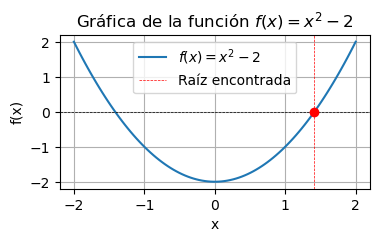

In [18]:
# Funcion que retorne las raices de un polinomio con newton raphson
def newton_raphson(f, f_prime, x0, tol=1e-6, max_iter=100):
    """
    Encuentra una raíz de la función f usando el método de Newton-Raphson.
    
    :param f: Función para la cual encontrar la raíz.
    :param f_prime: Derivada de la función f.
    :param x0: Aproximación inicial.
    :param tol: Tolerancia para la convergencia.
    :param max_iter: Número máximo de iteraciones.
    :return: Aproximación de la raíz.
    """
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / f_prime(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Ejemplo de uso: encontrar la raíz de la función f(x) = x^2 - 2
f = lambda x: x**2 - 2
f_prime = lambda x: 2 * x
x0 = 1.5
root = newton_raphson(f, f_prime, x0)
print(f"Raíz encontrada: {root}")

# graficaar la funcion f(x) = x^2 - 2 y la raiz encontrada
import matplotlib.pyplot as plt
import numpy as np

# Definimos la función f(x) = x^2 - 2
f = lambda x: x**2 - 2

# Definimos el rango de valores de x
x = np.linspace(-2, 2, 100)

# Calculamos los valores correspondientes de y
y = f(x)

# Graficamos la función
plt.figure(figsize=(4, 2))
plt.plot(x, y, label='$f(x) = x^2 - 2$')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(root, color='red', linewidth=0.5, linestyle='--', label='Raíz encontrada')
plt.scatter(root, 0, color='red', zorder=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de la función $f(x) = x^2 - 2$')
plt.legend()
plt.grid(True)
plt.show()


Polinomio de Legendre de grado 0: 1
Polinomio de Legendre de grado 1: x
Polinomio de Legendre de grado 2: 3*x**2/2 - 1/2
Polinomio de Legendre de grado 3: 5*x**3/2 - 3*x/2
Polinomio de Legendre de grado 4: 35*x**4/8 - 15*x**2/4 + 3/8
Polinomio de Legendre de grado 5: 63*x**5/8 - 35*x**3/4 + 15*x/8


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

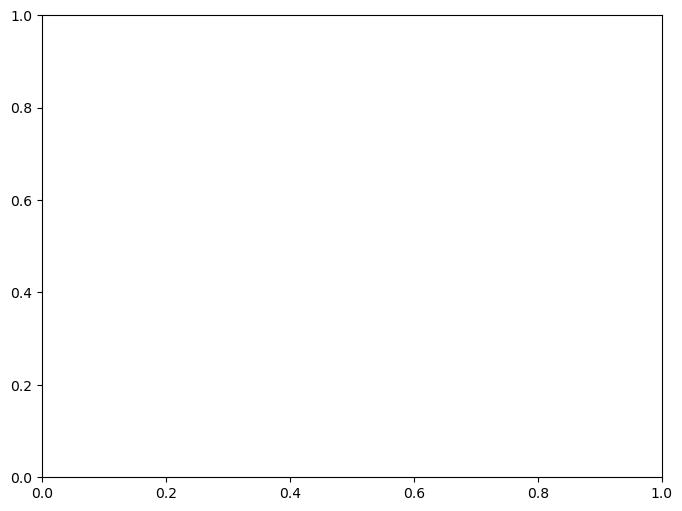

In [19]:
# Aproximar por legendre un polinomio de orden n
import numpy as np
import sympy as sp

def legendre_polynomial(n):
    """
    Calcula el polinomio de Legendre de grado n.
    
    :param n: Grado del polinomio.
    :return: Polinomio de Legendre de grado n.
    """
    x = sp.symbols('x')
    P = sp.legendre(n, x)
    return P

# Ejemplo: Polinomios de Legendre de grado 0 a 5
for n in range(6):
    P = legendre_polynomial(n)
    print(f"Polinomio de Legendre de grado {n}: {P}")
    
# Graficar los polinomios de Legendre de grado 0 a 5
import matplotlib.pyplot as plt
import numpy as np

# Definimos el rango de valores de x
x_values = np.linspace(-1, 1, 100)

# Creamos una figura para graficar los polinomios
plt.figure(figsize=(8, 6))

# Graficamos los polinomios de Legendre de grado 0 a 5
for n in range(6):
    P = legendre_polynomial(n)
    P_lambda = sp.lambdify('x', P, 'numpy')
    y_values = P_lambda(x_values)
    plt.plot(x_values, y_values, label=f'$P_{n}(x)$')
    
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Polinomios de Legendre de grado 0 a 5')
plt.legend()
plt.grid(True)
plt.show()